In [3]:
#Tyler Myerberg
#12.3.23
#Introduction to Data Science (COSC 360)
#Description: A linear and Ridge regression analysis of NBA historical statistics to predict win percentage.

#install the necessary Python libraries on your machine
#!pip install pandas numpy matplotlib scikit-learn

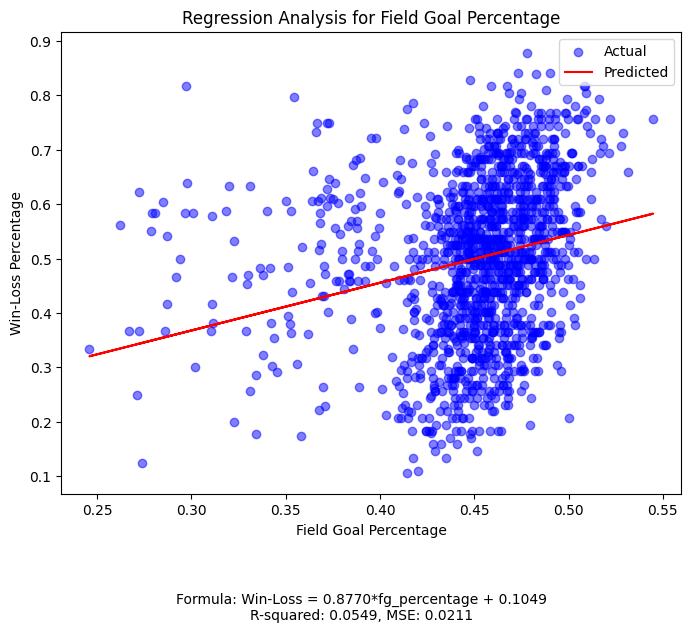

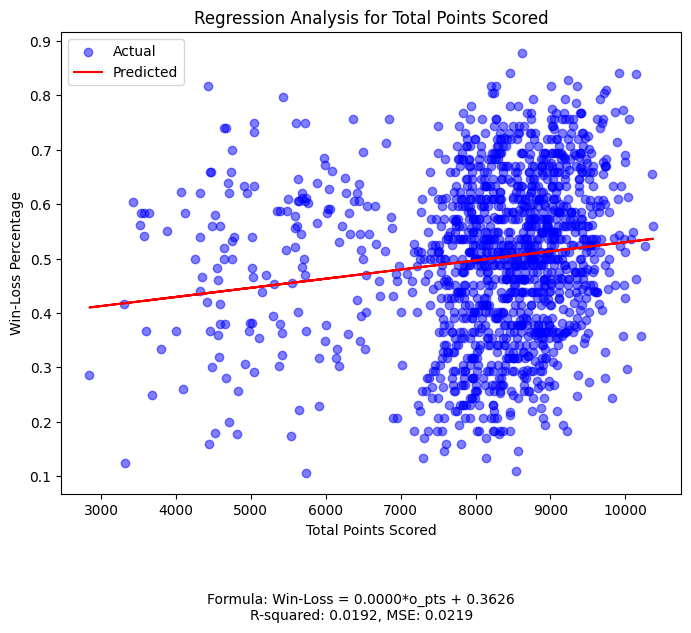

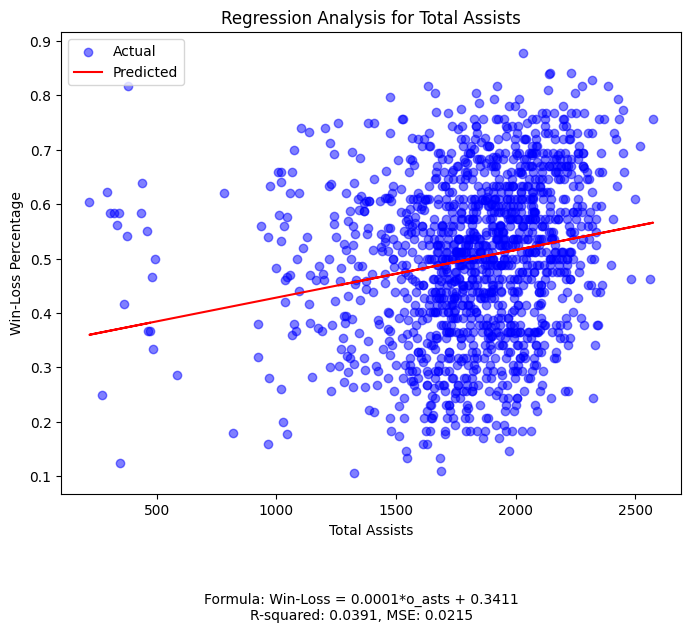

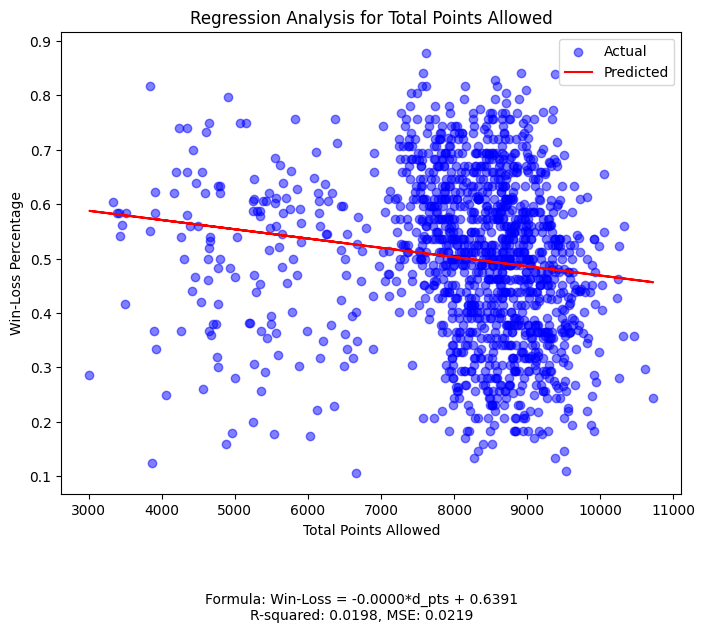

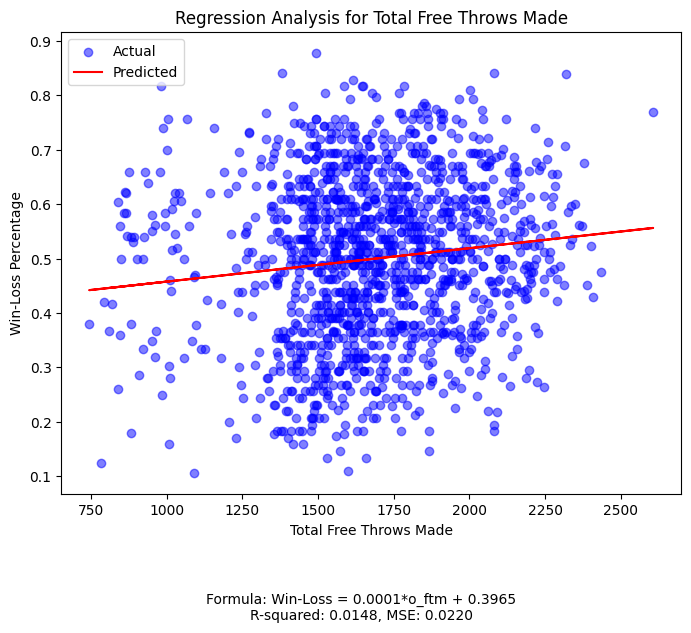

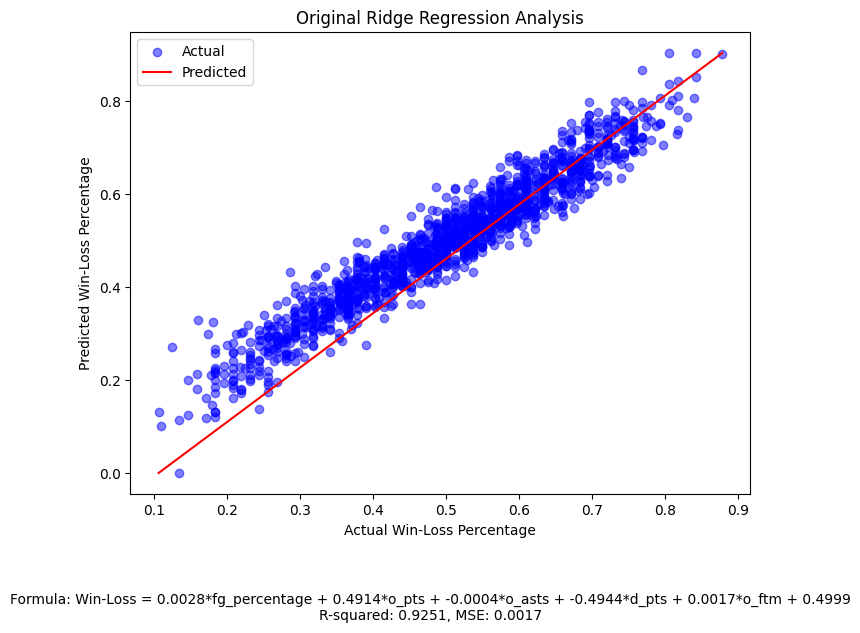

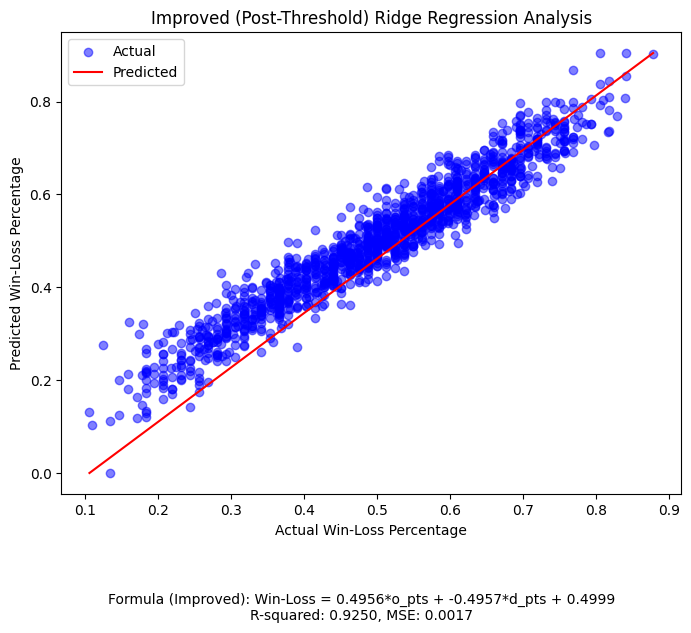

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

#read the CSV file containing the NBA data into a Pandas DataFrame
#a CSV (Comma Separated Values) file is a plain text file that contains data separated by commas
# 'pd.read_csv' is a function in Pandas that reads data from a CSV file into a DataFrame
#a DataFrame is a two-dimensional and size-mutable tabular data structure 
#similar to a spreadsheet and is one of the most commonly used Pandas objects
#the result of this function is stored in the variable 'data', which now holds the DataFrame
#the DataFrame 'data' will have rows and columns
#each row represents an observation (in this case, the performance metrics of an individual team from a specific season)
#each column represents a variable (like total points allowed, total assists, etc.)
#this step is crucial as it loads the data into a structured format, making it accessible for analysis
#DataFrames provide a wide range of functionalities for data manipulation, from simple operations like sorting and filtering 
#to more complex operations like merging and reshaping data
data = pd.read_csv('basketball_teams_cleaned.csv')

#calculate the field goal percentage as field goals made divided by field goals attempted
data['fg_percentage'] = data['o_fgm'] / data['o_fga']

#calculate the win-loss percentage as the number of games won divided by total games
data['win_loss_percentage'] = data['won'] / data['games']

#replace infinite values with NaN, and then drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

#define a list of feature names for the regression analysis
features = ['fg_percentage', 'o_pts', 'o_asts', 'd_pts', 'o_ftm']

#assign the win-loss percentage column as the target variable for the regression
y = data['win_loss_percentage']

#map feature names to more descriptive titles for plotting
feature_names = {
    
    'fg_percentage': 'Field Goal Percentage',
    'o_pts': 'Total Points Scored',
    'o_asts': 'Total Assists',
    'd_pts': 'Total Points Allowed',
    'o_ftm': 'Total Free Throws Made'
    
}

#loop through each feature in the 'features' list to create individual regression plots
for feature in features:
    
    #create a new figure and axis for each plot with specified size
    # 'fig' refers to the entire figure, 'ax' refers to the specific axes object in the figure
    #setting the size to 8x6 inches for better visibility of the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    #select the data for the current feature as the independent variable (X)
    #this step isolates the data for one specific feature to analyze its relationship with the target variable
    X_feature = data[[feature]]

    #initialize a linear regression model
    #LinearRegression() is a method from scikit-learn to perform linear regression
    lin_model = LinearRegression()

    #fit the linear regression model to the data
    #this process involves finding the best line that fits the data points for the current feature
    #the model learns the relationship between the feature (X_feature) and the target (y)
    lin_model.fit(X_feature, y)

    #make predictions using the fitted model
    #the model predicts the target variable (win-loss percentage) based on the feature data
    y_pred = lin_model.predict(X_feature)
    
    #extract the coefficient (slope) and intercept from the fitted model
    #the coefficient represents the change in the target variable for a one-unit change in the feature
    #the intercept is the value of the target variable when the feature is zero
    coefficient = lin_model.coef_[0]
    intercept = lin_model.intercept_

    #construct the linear regression formula as a string for display
    #this string represents the equation of the line fitted by the linear regression model
    formula = f'Win-Loss = {coefficient:.4f}*{feature} + {intercept:.4f}'

    #calculate the R-squared value for the model
    #R-squared is a statistical measure that represents the proportion of the variance in the dependent variable
    #that is predictable from the independent variable(s)
    #it represents how close the data are to the fitted regression line and is also known as the coefficient of determination
    #this metric provides an indication of the goodness of fit of the model
    #a higher R-squared value means the model explains more variability in the target variable relative to its mean
    #it provides an indication of how well the model explains the variation in the target variable
    r2 = r2_score(y, y_pred)

    #calculate the Mean Squared Error for the model
    #MSE is a measure of the average of the squares of the errors
    #the 'error' here is the difference between the actual and predicted values
    #MSE is a common measure of the accuracy of a regression model
    #a lower MSE indicates a closer fit of the model to the data
    mse = mean_squared_error(y, y_pred)

    #plot the actual data points on the plot
    #scatter plot is used to visualize the individual data points
    ax.scatter(X_feature, y, color='blue', alpha=0.5, label='Actual')

    #plot the regression line based on the model's predictions
    #the 'ax.plot' function is used to draw the line on the plot
    #'X_feature' represents the values of the current feature being analyzed
    #'y_pred' contains the predicted values of the target variable (win-loss percentage) by the linear regression model
    #these predictions are based on the learned relationship between 'X_feature' and 'y'
    #the line drawn represents the 'best fit' line through the data points
    #a 'best fit' line is the one where the total sum of the squares of the vertical distances of the points
    #from the line is minimized
    #this line visually demonstrates the trend or relationship as determined by the linear regression model
    #the closer the data points are to this line, the better the model is at predicting the target variable
    ax.plot(X_feature, y_pred, color='red', label='Predicted')

    #set the title, labels, and legend for the plot
    ax.set_title(f'Regression Analysis for {feature_names[feature]}')
    ax.set_xlabel(feature_names[feature])
    ax.set_ylabel('Win-Loss Percentage')
    ax.legend()

    #add the regression formula, R-squared value, and MSE value as a caption below the plot
    #this additional information provides insight into the model's equation and how well it fits
    plt.figtext(0.5, -0.1, f'Formula: {formula}\nR-squared: {r2:.4f}, MSE: {mse:.4f}', ha='center', fontsize=10)

    #display the plot
    #this command renders the plot and displays it to the user
    plt.show()

#prepare the feature data (independent variables) for Ridge Regression
#this step consolidates the selected features into a single DataFrame
#'X' will be used as the input for the Ridge regression model
X = data[features]

#set up a pipeline for Ridge regression, which includes standardization and the regression itself
#the pipeline in scikit-learn is a sequence of data processing steps combined into one
ridge_pipeline = Pipeline([
    
    #the first element in the pipeline is 'scaler', which uses StandardScaler()
    #StandardScaler is used for standardizing the dataset, a common requirement for many machine learning estimators
    #it transforms each feature (independent variable) to have zero mean and unit variance
    #this is important because features might be measured in different units, and we want to ensure comparability
    #for example, points scored (o_pts) and assists (o_asts) are on different scales and need standardizing
    ('scaler', StandardScaler()),

    #the second element is 'ridgecv', which uses RidgeCV for the Ridge regression
    #RidgeCV applies Ridge regression with built-in cross-validation of the alpha parameter
    #cross-validation is a technique to evaluate how effectively the model performs on unseen data
    #Ridge regression is a type of linear regression that includes a regularization term
    #the regularization term (alpha) penalizes large coefficients in the regression model
    #this helps to prevent overfitting, where a model performs well on training data but poorly on new, unseen data
    #the 'alphas' parameter here is a range of alpha values for which the cross-validation is performed
    #the range goes from 10^-6 to 10^6, logarithmically spaced, allowing the model to explore a wide range of regularization strengths
    ('ridgecv', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    
])

#fit the Ridge regression model to the data
#the 'fit' method is called on the pipeline object
#it first applies the standard scaler to the feature data (X), normalizing each feature
#it then fits the Ridge regression model to this standardized data
#the 'X' variable contains the feature data (like field goal percentage, total points scored, etc.)
#the 'y' variable is the target variable, which is the win-loss percentage of NBA teams
#this step trains the Ridge regression model, determining the best coefficients for each feature and the optimal alpha value
#the model is now ready to make predictions or be evaluated for its performance
ridge_pipeline.fit(X, y)

#use the fitted model to make predictions on the dataset
#the 'predict' method applies the trained Ridge regression model to the feature data 'X'
#it outputs the predicted target variable values based on the learned relationships in the model
#in this case, 'y_pred_ridge' will hold the win-loss percentage predictions made by the Ridge model
y_pred_ridge = ridge_pipeline.predict(X)

#extract the coefficients and intercept from the Ridge model
#the coefficients represent the relationship between each feature and the target variable
#in Ridge regression, these coefficients are optimized not only to fit the data but also to be as small as possible
#this is done to improve the model's generalizability and prevent overfitting
#'ridge_coefficients' holds these optimized coefficient values for each feature
ridge_coefficients = ridge_pipeline.named_steps['ridgecv'].coef_

#the intercept is a constant term in the regression equation
#it represents the expected mean value of the target variable when all the feature values are set to zero
#'ridge_intercept' holds the value of this intercept
ridge_intercept = ridge_pipeline.named_steps['ridgecv'].intercept_

#construct the Ridge regression formula as a string
#the formula represents the linear equation used by the Ridge regression model
#each term in the formula is a product of a feature's coefficient and the feature itself
#the 'join' function concatenates these terms into a single string, with each term separated by ' + '
#this provides a clear and concise representation of how each feature contributes to the predicted value
ridge_formula = ' + '.join([f'{coef:.4f}*{feat}' for coef, feat in zip(ridge_coefficients, features)])

#the final formula includes the intercept term, added at the end
#this complete formula can be used to manually compute predictions for given feature values
ridge_formula_full = f'Win-Loss = {ridge_formula} + {ridge_intercept:.4f}'

#calculate the R-squared value for the Ridge model
#'r2_ridge' will hold this R-squared value, indicating the proportion of variance in the win-loss percentage
#that is predictable from the features
r2_ridge = r2_score(y, y_pred_ridge)

#calculate the Mean Squared Error (MSE) for the Ridge model
mse_ridge = mean_squared_error(y, y_pred_ridge)

#plot the scatterplot for the original Ridge Regression model
fig, ax = plt.subplots(figsize=(8, 6))

#plot the actual data points
ax.scatter(y, y_pred_ridge, color='blue', alpha=0.5, label='Actual')

#plot the regression line based on the model's predictions
ax.plot([min(y), max(y)], [min(y_pred_ridge), max(y_pred_ridge)], color='red', label='Predicted')

#set the title, labels, and legend for the plot
ax.set_title('Original Ridge Regression Analysis')
ax.set_xlabel('Actual Win-Loss Percentage')
ax.set_ylabel('Predicted Win-Loss Percentage')
ax.legend()

#add the regression formula, R-squared, and MSE value as a caption below the plot
plt.figtext(0.5, -0.1, f'Formula: {ridge_formula_full}\nR-squared: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}', ha='center', fontsize=10)

#display the plot
plt.show()

#determine the threshold for identifying significant features
threshold = 0.01

#select features where the absolute value of the coefficient is greater than or equal to the threshold
features_to_keep = [feat for coef, feat in zip(ridge_coefficients, features) if abs(coef) >= threshold]

#prepare the data with the selected significant features
X_selected = data[features_to_keep]

#set up a new Ridge regression pipeline for the selected features
ridge_pipeline_selected = Pipeline([

    #as above, we use StandardScaler to standardize features by removing the mean and scaling to unit variance
    #each feature will have a mean value of 0 and a standard deviation of 1, ensuring all features are on the same scale
    ('scaler', StandardScaler()),

    #as above, we use RidgeCV for Ridge regression with built-in cross-validation of the alpha parameter
    ('ridgecv', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    
])

#fit the new Ridge model to the selected features
#the 'X_selected' variable contains the data for the features that passed the threshold criteria
#'y' is the target variable, which is the win-loss percentage of NBA teams
ridge_pipeline_selected.fit(X_selected, y)

#use the fitted model to make predictions on the selected features dataset
#'y_pred_ridge_selected' will store these predicted values
y_pred_ridge_selected = ridge_pipeline_selected.predict(X_selected)

#calculate the R-squared value for the new Ridge model
r2_ridge_selected = r2_score(y, y_pred_ridge_selected)

#calculate the Mean Squared Error (MSE) for the new model
mse_ridge_selected = mean_squared_error(y, y_pred_ridge_selected)

#extract the coefficients and intercept from the new Ridge model
ridge_coefficients_selected = ridge_pipeline_selected.named_steps['ridgecv'].coef_
ridge_intercept_selected = ridge_pipeline_selected.named_steps['ridgecv'].intercept_

#construct the formula for the new Ridge model using the extracted parameters
#this formula represents the linear equation that the model uses to make predictions
#each feature's contribution is shown with its corresponding coefficient
ridge_formula_selected = ' + '.join([f'{coef:.4f}*{feat}' for coef, feat in zip(ridge_coefficients_selected, features_to_keep)])
ridge_formula_selected_full = f'Win-Loss = {ridge_formula_selected} + {ridge_intercept_selected:.4f}'

#plot the scatterplot for the new Ridge Regression model
fig, ax = plt.subplots(figsize=(8, 6))

#plot the actual data points
ax.scatter(y, y_pred_ridge_selected, color='blue', alpha=0.5, label='Actual')

#plot the regression line based on the model's predictions
ax.plot([min(y), max(y)], [min(y_pred_ridge_selected), max(y_pred_ridge_selected)], color='red', label='Predicted')

#set the title, labels, and legend for the plot
ax.set_title('Improved (Post-Threshold) Ridge Regression Analysis')
ax.set_xlabel('Actual Win-Loss Percentage')
ax.set_ylabel('Predicted Win-Loss Percentage')
ax.legend()

#add the regression formula, R-squared, and Mean Squared Error values as a caption below the plot
plt.figtext(0.5, -0.1, f'Formula (Improved): {ridge_formula_selected_full}\nR-squared: {r2_ridge_selected:.4f}, MSE: {mse_ridge_selected:.4f}', ha='center', fontsize=10)

#display the plot
plt.show()